# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [9]:
import os
import keras

Using TensorFlow backend.


In [10]:
#import os
#import itertools
#from tensorflow.keras import backend
#from tensorflow.keras.datasets import cifar10

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [17]:
from tensorflow.python.framework import ops
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    # keras.backend.clear_session() # 把舊的 Graph 清掉
    ops.reset_default_graph() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which

Epoch 33/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.0352 - acc: 0.6293 - val_loss: 1.5288 - val_acc: 0.4820
Epoch 34/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.0023 - acc: 0.6439 - val_loss: 1.4587 - val_acc: 0.5087
Epoch 35/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.9921 - acc: 0.6482 - val_loss: 1.6361 - val_acc: 0.4430
Epoch 36/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.9818 - acc: 0.6500 - val_loss: 1.6415 - val_acc: 0.4795
Epoch 37/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.9611 - acc: 0.6589 - val_loss: 1.6220 - val_acc: 0.4581
Epoch 38/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.9429 - acc: 0.6648 - val_loss: 1.7924 - val_acc: 0.4444
Epoch 39/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.9299 - acc: 0.6698 - val_loss: 1.8437 - val_acc: 0.4476
Epoch 40/50
50000/50000 [===

Epoch 34/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.3747 - acc: 0.8717 - val_loss: 2.2178 - val_acc: 0.5067
Epoch 35/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.2879 - acc: 0.9011 - val_loss: 2.7941 - val_acc: 0.4684
Epoch 36/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3118 - acc: 0.6954 - val_loss: 2.2783 - val_acc: 0.4748
Epoch 37/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.4386 - acc: 0.8443 - val_loss: 2.4919 - val_acc: 0.4844
Epoch 38/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.3524 - acc: 0.8763 - val_loss: 3.1896 - val_acc: 0.4254
Epoch 39/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.4008 - acc: 0.8632 - val_loss: 2.2100 - val_acc: 0.5213
Epoch 40/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.2906 - acc: 0.8972 - val_loss: 3.2676 - val_acc: 0.4223
Epoch 41/50
50000/50000 [==

Epoch 35/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.0132 - acc: 0.9983 - val_loss: 3.4382 - val_acc: 0.5259
Epoch 36/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.9754 - acc: 0.7198 - val_loss: 3.2439 - val_acc: 0.4618
Epoch 37/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.4047 - acc: 0.8620 - val_loss: 3.0334 - val_acc: 0.4899
Epoch 38/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.2414 - acc: 0.9165 - val_loss: 3.0481 - val_acc: 0.5109
Epoch 39/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.0865 - acc: 0.9726 - val_loss: 3.0877 - val_acc: 0.5199
Epoch 40/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.0535 - acc: 0.9858 - val_loss: 3.1293 - val_acc: 0.5223
Epoch 41/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.0337 - acc: 0.9925 - val_loss: 3.1054 - val_acc: 0.5344
Epoch 42/50
50000/50000 [==

Epoch 36/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 3.7429 - val_acc: 0.5405
Epoch 37/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.7439 - val_acc: 0.5408
Epoch 38/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.7494 - val_acc: 0.5412
Epoch 39/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 3.7568 - val_acc: 0.5397
Epoch 40/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7604 - val_acc: 0.5415
Epoch 41/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7665 - val_acc: 0.5420
Epoch 42/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.7678 - val_acc: 0.5409
Epoch 43/50
50000/50000 [==

50000/50000 [==============================] - 6s 120us/step - loss: 7.8970e-04 - acc: 1.0000 - val_loss: 3.9173 - val_acc: 0.5386
Epoch 37/50
50000/50000 [==============================] - 6s 111us/step - loss: 7.9038e-04 - acc: 1.0000 - val_loss: 3.9195 - val_acc: 0.5397
Epoch 38/50
50000/50000 [==============================] - 5s 104us/step - loss: 7.7782e-04 - acc: 1.0000 - val_loss: 3.9222 - val_acc: 0.5400
Epoch 39/50
50000/50000 [==============================] - 5s 105us/step - loss: 7.6471e-04 - acc: 1.0000 - val_loss: 3.9241 - val_acc: 0.5389
Epoch 40/50
50000/50000 [==============================] - 5s 106us/step - loss: 7.5923e-04 - acc: 1.0000 - val_loss: 3.9263 - val_acc: 0.5395
Epoch 41/50
50000/50000 [==============================] - 5s 106us/step - loss: 7.5270e-04 - acc: 1.0000 - val_loss: 3.9319 - val_acc: 0.5392
Epoch 42/50
50000/50000 [==============================] - 5s 107us/step - loss: 7.4257e-04 - acc: 1.0000 - val_loss: 3.9340 - val_acc: 0.5400
Epoch 43/50

50000/50000 [==============================] - 5s 106us/step - loss: 5.2023e-04 - acc: 1.0000 - val_loss: 4.0184 - val_acc: 0.5395
Epoch 36/50
50000/50000 [==============================] - 5s 104us/step - loss: 5.1673e-04 - acc: 1.0000 - val_loss: 4.0224 - val_acc: 0.5381
Epoch 37/50
50000/50000 [==============================] - 5s 103us/step - loss: 5.2005e-04 - acc: 1.0000 - val_loss: 4.0218 - val_acc: 0.5393
Epoch 38/50
50000/50000 [==============================] - 7s 150us/step - loss: 5.0992e-04 - acc: 1.0000 - val_loss: 4.0228 - val_acc: 0.5396
Epoch 39/50
50000/50000 [==============================] - 6s 129us/step - loss: 5.0821e-04 - acc: 1.0000 - val_loss: 4.0257 - val_acc: 0.5386
Epoch 40/50
50000/50000 [==============================] - 7s 141us/step - loss: 5.0597e-04 - acc: 1.0000 - val_loss: 4.0231 - val_acc: 0.5375
Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 4.9879e-04 - acc: 1.0000 - val_loss: 4.0276 - val_acc: 0.5387
Epoch 42/50

50000/50000 [==============================] - 5s 107us/step - loss: 3.8448e-04 - acc: 1.0000 - val_loss: 4.0886 - val_acc: 0.5386
Epoch 35/50
50000/50000 [==============================] - 5s 106us/step - loss: 3.8196e-04 - acc: 1.0000 - val_loss: 4.0900 - val_acc: 0.5396
Epoch 36/50
50000/50000 [==============================] - 6s 115us/step - loss: 3.8101e-04 - acc: 1.0000 - val_loss: 4.0901 - val_acc: 0.5389
Epoch 37/50
50000/50000 [==============================] - 6s 119us/step - loss: 3.7938e-04 - acc: 1.0000 - val_loss: 4.0912 - val_acc: 0.5391
Epoch 38/50
50000/50000 [==============================] - 6s 114us/step - loss: 3.7633e-04 - acc: 1.0000 - val_loss: 4.0937 - val_acc: 0.5392
Epoch 39/50
50000/50000 [==============================] - 6s 120us/step - loss: 3.7451e-04 - acc: 1.0000 - val_loss: 4.0938 - val_acc: 0.5398
Epoch 40/50
50000/50000 [==============================] - 5s 108us/step - loss: 3.7159e-04 - acc: 1.0000 - val_loss: 4.0961 - val_acc: 0.5383
Epoch 41/50

50000/50000 [==============================] - 5s 110us/step - loss: 3.0408e-04 - acc: 1.0000 - val_loss: 4.1443 - val_acc: 0.5392
Epoch 34/50
50000/50000 [==============================] - 6s 112us/step - loss: 3.0194e-04 - acc: 1.0000 - val_loss: 4.1458 - val_acc: 0.5393
Epoch 35/50
50000/50000 [==============================] - 5s 106us/step - loss: 3.0071e-04 - acc: 1.0000 - val_loss: 4.1458 - val_acc: 0.5393
Epoch 36/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.9950e-04 - acc: 1.0000 - val_loss: 4.1465 - val_acc: 0.5394
Epoch 37/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.9794e-04 - acc: 1.0000 - val_loss: 4.1495 - val_acc: 0.5387
Epoch 38/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.9709e-04 - acc: 1.0000 - val_loss: 4.1481 - val_acc: 0.5394
Epoch 39/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.9605e-04 - acc: 1.0000 - val_loss: 4.1503 - val_acc: 0.5388
Epoch 40/50

50000/50000 [==============================] - 5s 106us/step - loss: 2.4934e-04 - acc: 1.0000 - val_loss: 4.1875 - val_acc: 0.5390
Epoch 33/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.4811e-04 - acc: 1.0000 - val_loss: 4.1905 - val_acc: 0.5392
Epoch 34/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.4835e-04 - acc: 1.0000 - val_loss: 4.1892 - val_acc: 0.5388
Epoch 35/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.4649e-04 - acc: 1.0000 - val_loss: 4.1917 - val_acc: 0.5389
Epoch 36/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4565e-04 - acc: 1.0000 - val_loss: 4.1913 - val_acc: 0.5390
Epoch 37/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.4471e-04 - acc: 1.0000 - val_loss: 4.1931 - val_acc: 0.5390
Epoch 38/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.4354e-04 - acc: 1.0000 - val_loss: 4.1942 - val_acc: 0.5399
Epoch 39/50

50000/50000 [==============================] - 6s 120us/step - loss: 2.1115e-04 - acc: 1.0000 - val_loss: 4.2270 - val_acc: 0.5396
Epoch 32/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.1044e-04 - acc: 1.0000 - val_loss: 4.2287 - val_acc: 0.5396
Epoch 33/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0954e-04 - acc: 1.0000 - val_loss: 4.2289 - val_acc: 0.5393
Epoch 34/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.0885e-04 - acc: 1.0000 - val_loss: 4.2288 - val_acc: 0.5395
Epoch 35/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.0820e-04 - acc: 1.0000 - val_loss: 4.2300 - val_acc: 0.5394
Epoch 36/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.0754e-04 - acc: 1.0000 - val_loss: 4.2303 - val_acc: 0.5397
Epoch 37/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.0698e-04 - acc: 1.0000 - val_loss: 4.2310 - val_acc: 0.5393
Epoch 38/50

50000/50000 [==============================] - 5s 106us/step - loss: 1.8230e-04 - acc: 1.0000 - val_loss: 4.2602 - val_acc: 0.5404
Epoch 31/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.8197e-04 - acc: 1.0000 - val_loss: 4.2612 - val_acc: 0.5394
Epoch 32/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8144e-04 - acc: 1.0000 - val_loss: 4.2608 - val_acc: 0.5389
Epoch 33/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8083e-04 - acc: 1.0000 - val_loss: 4.2627 - val_acc: 0.5392
Epoch 34/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8050e-04 - acc: 1.0000 - val_loss: 4.2614 - val_acc: 0.5401
Epoch 35/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8001e-04 - acc: 1.0000 - val_loss: 4.2636 - val_acc: 0.5402
Epoch 36/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7939e-04 - acc: 1.0000 - val_loss: 4.2639 - val_acc: 0.5402
Epoch 37/50

50000/50000 [==============================] - 5s 107us/step - loss: 1.6026e-04 - acc: 1.0000 - val_loss: 4.2881 - val_acc: 0.5393
Epoch 30/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5995e-04 - acc: 1.0000 - val_loss: 4.2883 - val_acc: 0.5393
Epoch 31/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5944e-04 - acc: 1.0000 - val_loss: 4.2893 - val_acc: 0.5403
Epoch 32/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5929e-04 - acc: 1.0000 - val_loss: 4.2892 - val_acc: 0.5401
Epoch 33/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5880e-04 - acc: 1.0000 - val_loss: 4.2909 - val_acc: 0.5397 1.5881e-04 - acc: 1.00
Epoch 34/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5849e-04 - acc: 1.0000 - val_loss: 4.2908 - val_acc: 0.5402
Epoch 35/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5780e-04 - acc: 1.0000 - val_loss: 4.2926 - val_

50000/50000 [==============================] - 5s 108us/step - loss: 1.4385e-04 - acc: 1.0000 - val_loss: 4.3141 - val_acc: 0.5395
Epoch 29/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4250e-04 - acc: 1.0000 - val_loss: 4.3147 - val_acc: 0.5397
Epoch 30/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4218e-04 - acc: 1.0000 - val_loss: 4.3155 - val_acc: 0.5397
Epoch 31/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4185e-04 - acc: 1.0000 - val_loss: 4.3156 - val_acc: 0.5401
Epoch 32/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4172e-04 - acc: 1.0000 - val_loss: 4.3165 - val_acc: 0.5399
Epoch 33/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4129e-04 - acc: 1.0000 - val_loss: 4.3163 - val_acc: 0.5395
Epoch 34/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.4093e-04 - acc: 1.0000 - val_loss: 4.3167 - val_acc: 0.5397
Epoch 35/50

50000/50000 [==============================] - 5s 109us/step - loss: 1.2857e-04 - acc: 1.0000 - val_loss: 4.3371 - val_acc: 0.5397
Epoch 28/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2841e-04 - acc: 1.0000 - val_loss: 4.3373 - val_acc: 0.5398
Epoch 29/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2805e-04 - acc: 1.0000 - val_loss: 4.3384 - val_acc: 0.5397
Epoch 30/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2774e-04 - acc: 1.0000 - val_loss: 4.3379 - val_acc: 0.5394
Epoch 31/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.2761e-04 - acc: 1.0000 - val_loss: 4.3387 - val_acc: 0.5391
Epoch 32/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.2732e-04 - acc: 1.0000 - val_loss: 4.3396 - val_acc: 0.5394
Epoch 33/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2708e-04 - acc: 1.0000 - val_loss: 4.3386 - val_acc: 0.5391
Epoch 34/50

50000/50000 [==============================] - 5s 107us/step - loss: 1.1686e-04 - acc: 1.0000 - val_loss: 4.3575 - val_acc: 0.5394
Epoch 27/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1667e-04 - acc: 1.0000 - val_loss: 4.3584 - val_acc: 0.5399
Epoch 28/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1632e-04 - acc: 1.0000 - val_loss: 4.3584 - val_acc: 0.5394
Epoch 29/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.1612e-04 - acc: 1.0000 - val_loss: 4.3593 - val_acc: 0.5392
Epoch 30/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1589e-04 - acc: 1.0000 - val_loss: 4.3591 - val_acc: 0.5396
Epoch 31/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1576e-04 - acc: 1.0000 - val_loss: 4.3597 - val_acc: 0.5397
Epoch 32/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1551e-04 - acc: 1.0000 - val_loss: 4.3600 - val_acc: 0.5393
Epoch 33/50

50000/50000 [==============================] - 5s 108us/step - loss: 1.0695e-04 - acc: 1.0000 - val_loss: 4.3767 - val_acc: 0.5392
Epoch 26/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.0673e-04 - acc: 1.0000 - val_loss: 4.3766 - val_acc: 0.5389
Epoch 27/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.0653e-04 - acc: 1.0000 - val_loss: 4.3772 - val_acc: 0.5394
Epoch 28/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0635e-04 - acc: 1.0000 - val_loss: 4.3781 - val_acc: 0.5394
Epoch 29/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0611e-04 - acc: 1.0000 - val_loss: 4.3784 - val_acc: 0.5391
Epoch 30/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0599e-04 - acc: 1.0000 - val_loss: 4.3792 - val_acc: 0.5393
Epoch 31/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.0580e-04 - acc: 1.0000 - val_loss: 4.3785 - val_acc: 0.5390
Epoch 32/50

50000/50000 [==============================] - 5s 110us/step - loss: 9.8442e-05 - acc: 1.0000 - val_loss: 4.3939 - val_acc: 0.5391
Epoch 25/50
50000/50000 [==============================] - 7s 137us/step - loss: 9.8188e-05 - acc: 1.0000 - val_loss: 4.3955 - val_acc: 0.5389
Epoch 26/50
50000/50000 [==============================] - 6s 114us/step - loss: 9.8159e-05 - acc: 1.0000 - val_loss: 4.3952 - val_acc: 0.5390
Epoch 27/50
50000/50000 [==============================] - 6s 116us/step - loss: 9.7868e-05 - acc: 1.0000 - val_loss: 4.3955 - val_acc: 0.5390
Epoch 28/50
50000/50000 [==============================] - 5s 110us/step - loss: 9.7809e-05 - acc: 1.0000 - val_loss: 4.3953 - val_acc: 0.5389
Epoch 29/50
50000/50000 [==============================] - 5s 109us/step - loss: 9.7641e-05 - acc: 1.0000 - val_loss: 4.3961 - val_acc: 0.5388
Epoch 30/50
50000/50000 [==============================] - 5s 107us/step - loss: 9.7475e-05 - acc: 1.0000 - val_loss: 4.3964 - val_acc: 0.5391
Epoch 31/50

50000/50000 [==============================] - 5s 106us/step - loss: 9.1124e-05 - acc: 1.0000 - val_loss: 4.4104 - val_acc: 0.5387
Epoch 24/50
50000/50000 [==============================] - 8s 154us/step - loss: 9.0933e-05 - acc: 1.0000 - val_loss: 4.4110 - val_acc: 0.5392
Epoch 25/50
50000/50000 [==============================] - 7s 136us/step - loss: 9.0866e-05 - acc: 1.0000 - val_loss: 4.4118 - val_acc: 0.5389
Epoch 26/50
50000/50000 [==============================] - 7s 133us/step - loss: 9.0687e-05 - acc: 1.0000 - val_loss: 4.4122 - val_acc: 0.5392
Epoch 27/50
50000/50000 [==============================] - 6s 114us/step - loss: 9.0636e-05 - acc: 1.0000 - val_loss: 4.4119 - val_acc: 0.5390
Epoch 28/50
50000/50000 [==============================] - 5s 109us/step - loss: 9.0418e-05 - acc: 1.0000 - val_loss: 4.4118 - val_acc: 0.5387
Epoch 29/50
50000/50000 [==============================] - 7s 140us/step - loss: 9.0362e-05 - acc: 1.0000 - val_loss: 4.4132 - val_acc: 0.5391
Epoch 30/50

50000/50000 [==============================] - 7s 140us/step - loss: 8.4833e-05 - acc: 1.0000 - val_loss: 4.4256 - val_acc: 0.5388
Epoch 23/50
50000/50000 [==============================] - 7s 145us/step - loss: 8.4677e-05 - acc: 1.0000 - val_loss: 4.4258 - val_acc: 0.5386
Epoch 24/50
50000/50000 [==============================] - 10s 203us/step - loss: 8.4555e-05 - acc: 1.0000 - val_loss: 4.4262 - val_acc: 0.5385
Epoch 25/50
50000/50000 [==============================] - 6s 127us/step - loss: 8.4439e-05 - acc: 1.0000 - val_loss: 4.4264 - val_acc: 0.5387
Epoch 26/50
50000/50000 [==============================] - 6s 128us/step - loss: 8.4298e-05 - acc: 1.0000 - val_loss: 4.4277 - val_acc: 0.5391
Epoch 27/50
50000/50000 [==============================] - 6s 124us/step - loss: 8.4224e-05 - acc: 1.0000 - val_loss: 4.4271 - val_acc: 0.5386
Epoch 28/50
50000/50000 [==============================] - 6s 119us/step - loss: 8.4120e-05 - acc: 1.0000 - val_loss: 4.4278 - val_acc: 0.5386
Epoch 29/5

50000/50000 [==============================] - 6s 112us/step - loss: 7.9209e-05 - acc: 1.0000 - val_loss: 4.4403 - val_acc: 0.5386
Epoch 22/50
50000/50000 [==============================] - 5s 109us/step - loss: 7.9096e-05 - acc: 1.0000 - val_loss: 4.4402 - val_acc: 0.5384
Epoch 23/50
50000/50000 [==============================] - 6s 116us/step - loss: 7.8996e-05 - acc: 1.0000 - val_loss: 4.4407 - val_acc: 0.5383
Epoch 24/50
50000/50000 [==============================] - 5s 109us/step - loss: 7.8929e-05 - acc: 1.0000 - val_loss: 4.4406 - val_acc: 0.5383
Epoch 25/50
50000/50000 [==============================] - 5s 110us/step - loss: 7.8814e-05 - acc: 1.0000 - val_loss: 4.4405 - val_acc: 0.5382
Epoch 26/50
50000/50000 [==============================] - 5s 108us/step - loss: 7.8717e-05 - acc: 1.0000 - val_loss: 4.4407 - val_acc: 0.5383
Epoch 27/50
50000/50000 [==============================] - 5s 108us/step - loss: 7.8582e-05 - acc: 1.0000 - val_loss: 4.4412 - val_acc: 0.5387
Epoch 28/50

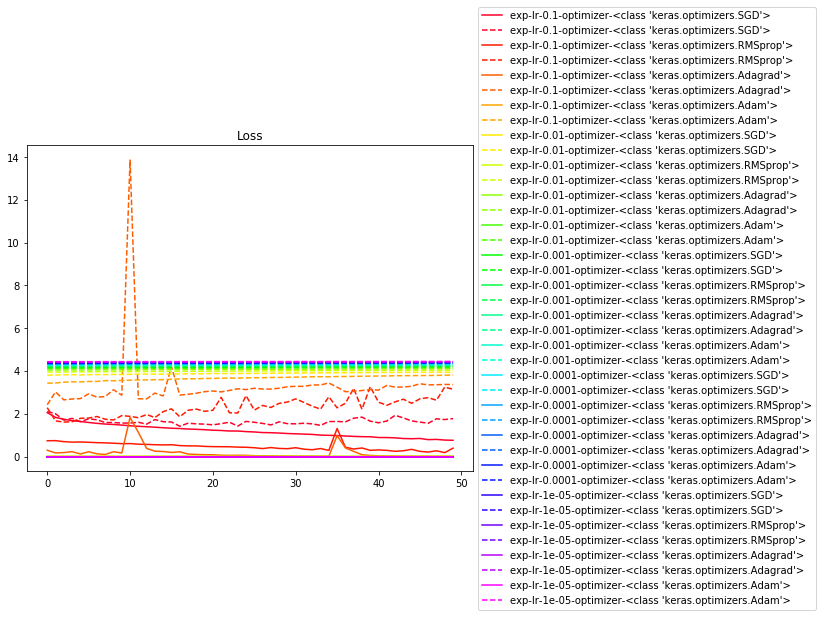

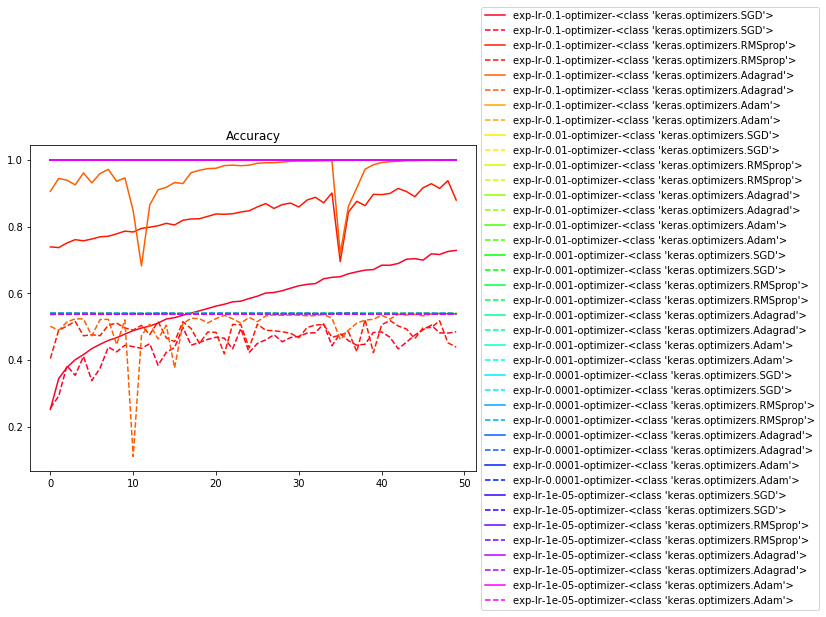

In [18]:
"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()